In [156]:
%pip install mlxtend
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules 

#---Read data from .csv---#
path = "C:/Users/pat1c/Documents/Uni/Y4/DM/CW/cardio_train.csv"
dataset = pd.read_csv(path, sep=';')


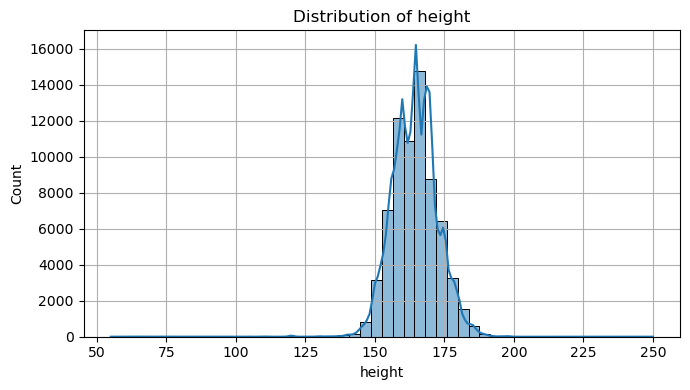

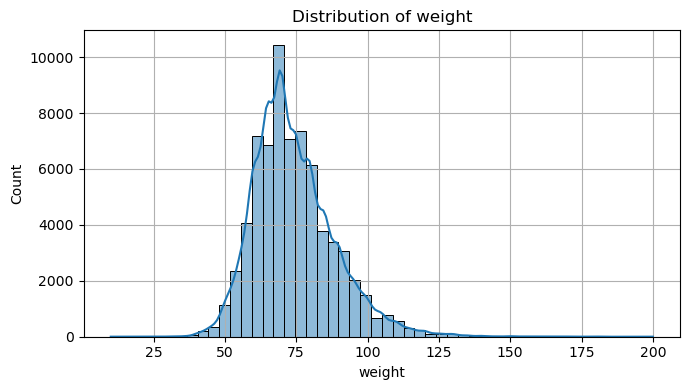

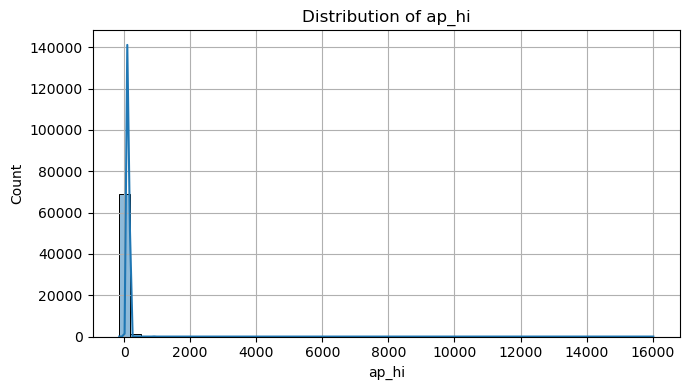

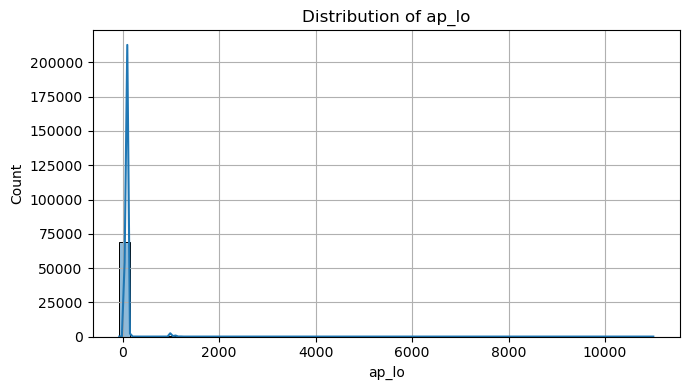

In [158]:
#---Visualisation of dataset---#

objective_features = ['height', 'weight', 'ap_hi', 'ap_lo']

for feature in objective_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(dataset[feature], kde=True, bins=50)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [159]:
#---Data Pre-processing---#

#Drop entry ID column
rule_prep = dataset.drop(columns=['id'])
#Convert age into years
rule_prep['age'] = (rule_prep['age'] / 365).astype(int)

#Remove outliers in height, weight and blood pressure columns
rule_prep = rule_prep[(rule_prep['height'] >= 140) & (rule_prep['height'] <= 200)
                      & (rule_prep['weight'] >= 30) & (rule_prep['weight'] <= 150)
                      & (rule_prep['ap_hi'] >= 90) & (rule_prep['ap_hi'] <= 200)
                      & (rule_prep['ap_lo'] >= 60) & (rule_prep['ap_lo'] <= 130)]


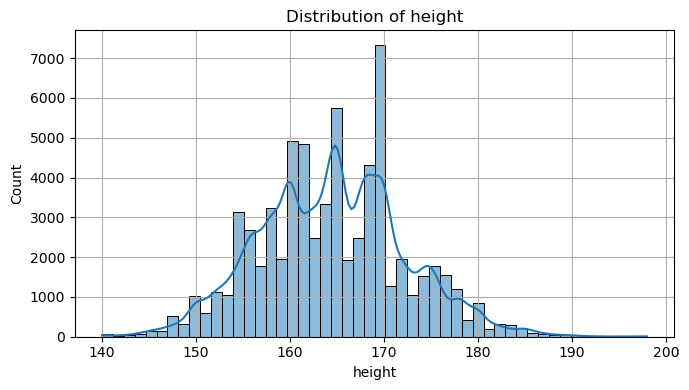

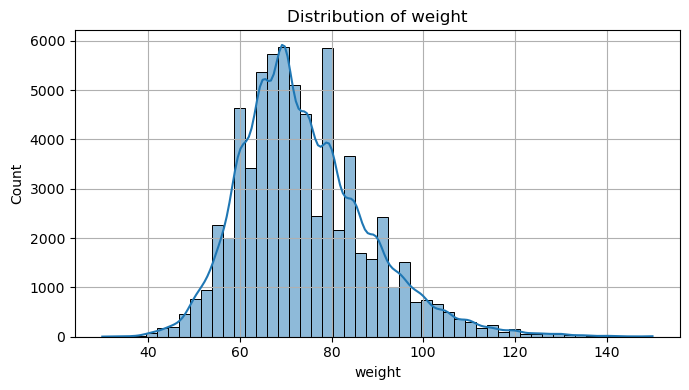

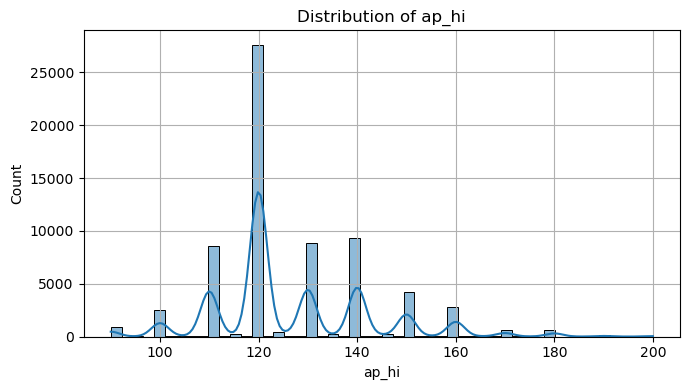

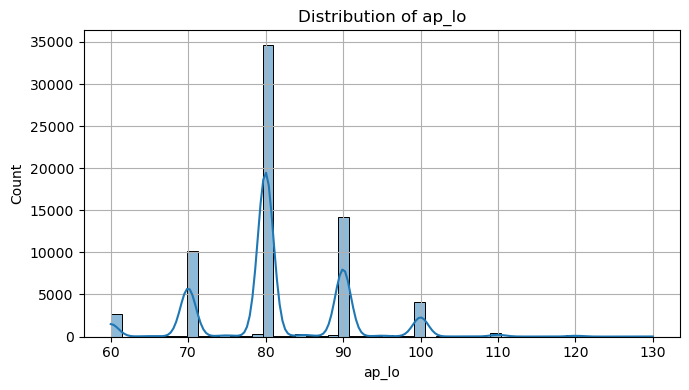

In [160]:
#---Visualisation of dataset after pre-processing---#
for feature in objective_features:
    plt.figure(figsize=(7, 4))
    sns.histplot(rule_prep[feature], kde=True, bins=50)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [161]:
#---Categorise data---#

#Sort numerical data into bins
rule_prep['age'] = pd.cut(rule_prep['age'], bins=[28, 40, 50, 60, 70], labels=["28-40", "41-50", "51-60", "61-70"])
rule_prep['height'] = pd.cut(rule_prep['height'], bins=[140, 150, 165, 180, 200], labels=["short", "medium", "tall", "very tall"])
rule_prep['weight'] = pd.cut(rule_prep['weight'], bins=[30, 60, 75, 90, 150], labels=["underweight", "normal", "overweight", "obese"])
rule_prep['ap_hi'] = pd.cut(rule_prep['ap_hi'], bins=[90, 120, 140, 160, 200], labels=["normal", "elevated", "high", "very_high"])
rule_prep['ap_lo'] = pd.cut(rule_prep['ap_lo'], bins=[60, 80, 90, 100, 130], labels=["normal", "elevated", "high", "very_high"])

#Map categorical data
rule_prep['gender'] = rule_prep['gender'].map({1: "female", 2: "male"})
rule_prep['cholesterol'] = rule_prep['cholesterol'].map({1: "normal", 2: "high", 3: "very_high"})
rule_prep['gluc'] = rule_prep['gluc'].map({1: "normal", 2: "high", 3: "very_high"})
rule_prep['smoke'] = rule_prep['smoke'].map({0: "no", 1: "yes"})
rule_prep['alco'] = rule_prep['alco'].map({0: "no", 1: "yes"})
rule_prep['active'] = rule_prep['active'].map({0: "no", 1: "yes"})
rule_prep['cardio'] = rule_prep['cardio'].map({0: "no", 1: "yes"})

transactions = pd.get_dummies(rule_prep)

In [162]:
#---Create large itemsets---#
large_itemsets = apriori(transactions, min_support=0.08, use_colnames=True)


In [163]:
#---Create rules from large itemsets---#
rules = association_rules(large_itemsets, metric="confidence", min_threshold=0.7)


In [164]:
#---Print out rules with highest lift---#
cardio_rules = rules[(rules['consequents'].apply(lambda x: len(x) == 1 and 'cardio_no' in list(x)[0]))]

cardio_rules_sorted = cardio_rules.sort_values(by='lift', ascending=False).head(10)

for idx, row in cardio_rules_sorted.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"Rule: IF {antecedents}")
    print(f"THEN {consequents}")
    print(f"  Support: {row['support']:.3f}")
    print(f"  Confidence: {row['confidence']:.3f}")
    print(f"  Lift: {row['lift']:.3f}")
    print("-" * 60)

Rule: IF cholesterol_normal, gluc_normal, gender_female, age_41-50, ap_hi_normal
THEN cardio_no
  Support: 0.085
  Confidence: 0.815
  Lift: 1.613
------------------------------------------------------------
Rule: IF cholesterol_normal, gluc_normal, gender_female, smoke_no, age_41-50, ap_hi_normal
THEN cardio_no
  Support: 0.083
  Confidence: 0.814
  Lift: 1.611
------------------------------------------------------------
Rule: IF cholesterol_normal, gluc_normal, active_yes, age_41-50, ap_hi_normal
THEN cardio_no
  Support: 0.108
  Confidence: 0.813
  Lift: 1.610
------------------------------------------------------------
Rule: IF cholesterol_normal, gluc_normal, gender_female, alco_no, age_41-50, ap_hi_normal
THEN cardio_no
  Support: 0.083
  Confidence: 0.813
  Lift: 1.610
------------------------------------------------------------
Rule: IF cholesterol_normal, gluc_normal, gender_female, alco_no, smoke_no, age_41-50, ap_hi_normal
THEN cardio_no
  Support: 0.082
  Confidence: 0.813
